In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.drop(columns=['Cabin'], inplace=True)

In [9]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [10]:
df['Embarked'].nunique()

3

In [11]:
df['male']= pd.get_dummies(df['Sex'], dtype= int, drop_first= True)

In [12]:
df['male']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: male, Length: 891, dtype: int32

In [13]:
df.drop(columns=['Sex'], inplace=True)

In [14]:
import statistics as stat

In [15]:
stat.mode(df['Embarked'])

'S'

In [16]:
df['Embarked']= df['Embarked'].fillna(stat.mode(df['Embarked']))

In [17]:
df[['Q','S']]=pd.get_dummies(df['Embarked'], dtype=int,drop_first=True)

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [19]:
df.drop(['Embarked'],axis=1, inplace=True)

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
male             0
Q                0
S                0
dtype: int64

In [22]:
np.mean(df['Age'])

29.69911764705882

In [23]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [25]:
df.drop(['PassengerId'],axis=1, inplace=True)

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [27]:
X= df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]

In [28]:
y=df[['Survived']]

In [29]:
from sklearn.preprocessing import StandardScaler


In [30]:
ss = StandardScaler()


In [31]:
X= ss.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [34]:
X_train

array([[-1.56610693,  1.87005862, -0.4745452 , ...,  0.73769513,
        -0.30756234,  0.61583843],
       [ 0.82737724,  0.        , -0.4745452 , ...,  0.73769513,
         3.25137334, -1.62380254],
       [-0.36936484, -0.36161755,  0.43279337, ...,  0.73769513,
        -0.30756234, -1.62380254],
       ...,
       [ 0.82737724,  0.86965206,  1.34013193, ...,  0.73769513,
        -0.30756234,  0.61583843],
       [-1.56610693, -1.20811541,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.66943495, -0.4745452 , ...,  0.73769513,
        -0.30756234,  0.61583843]])

In [35]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
715,0
525,0
381,1
140,0


In [36]:
X_test.shape

(295, 8)

In [37]:
y_train

,Survived
6,0
718,0
685,0
73,0
882,0
...,...
106,1
270,0
860,0
435,1


In [38]:
# intitializing ann
import tensorflow as tf
ann = tf.keras.models.Sequential() 

In [64]:
# input layer and hidden layer 1
ann.add(tf.keras.layers.Dense(units = 30, activation = 'relu'))

In [65]:
#Hidden layer 2
ann.add(tf.keras.layers.Dense(units = 15, activation = 'relu'))

In [66]:
#Hidden layer 3
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

In [67]:
# Output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [68]:
# Optimizing by Adam Optimizer, 'binary_crossentropy' is selected as Loss function
# accuracy is selected as metrics
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [69]:
# Fitting X_train_train and y_train_train in our model
ann.fit(X_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8105 - loss: 0.6588
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8698 - loss: 0.4969
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8687 - loss: 0.3746
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.3415
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8667 - loss: 0.3401
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8717 - loss: 0.3343
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8845 - loss: 0.3148
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8901 - loss: 0.3079
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8648 - loss: 0.3259
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8820 - loss: 0.3000
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8713 - loss: 0.3155
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [70]:
ann_loss = pd.DataFrame(ann.history.history)

<Axes: >

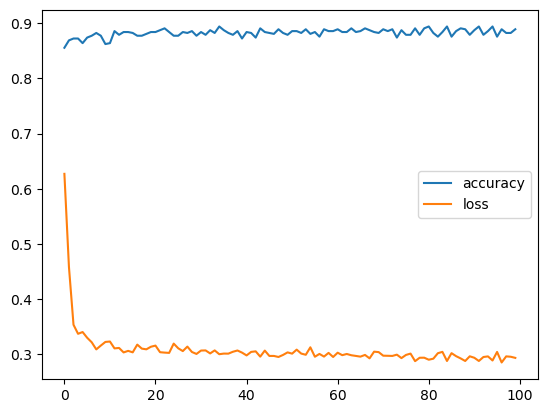

In [71]:
ann_loss.plot()

In [72]:
y_pred = (ann.predict(X_test) > 0.5 ).astype("int32")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [74]:
accuracy_score(y_test, y_pred)

0.7728813559322034

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       175
           1       0.78      0.61      0.69       120

    accuracy                           0.77       295
   macro avg       0.78      0.75      0.75       295
weighted avg       0.77      0.77      0.77       295



In [76]:
confusion_matrix(y_test,y_pred)

array([[155,  20],
       [ 47,  73]], dtype=int64)